## A. Pengenalan

### Final Project 3
=== program Python for Data science Hacktiv8 x Kampus Merdeka, Kelompok 4 kelas KS18 ===
- Achmad Dhiaulhaq (PYTN-KS18-019)
- Dizqy Hidayat DM (PYTN-KS18-020)
- Naufal Fakhry Pratama (PYTN-KS18-014)

### Project overview :

- Latar belakang pemilihan kasus : 
dalam project ini pemilihan kasus didasari oleh penerapan pembalajaran yang sudah dipelajari pada program Python for Data Science Hacktiv8, untuk final project 3 yang ingin digapai adalah penerapan pembelajaran konsep Ensemble dalam develop model machine learning.
- Dataset yang digunakan :
Sesuai intruksi dari program python for data science dari Hacktiv8 x Kampus Merdeka, untuk final project 3 menggunakan dataset yang sudah disediakan yaitu data "Heart Failure Prediction" dari website kagle dengan link (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data). Data yang tersedia berukuran 12,24 KB dan berbentuk CSV yang mencakup 13 Kolom dan 299 baris untuk isinya, Kumpulan data ini berisi variabel yang dapat memprediksi gagal jantung untuk manusia.

- Objective yang ingin dicapai :
    - Mampu memahami konsep Classification dengan Ensemble Model
    - Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
    - Mampu mengimplementasikan Ensemble Model untuk membuat prediksi



- Hasil yang diharapkan :
    - Model dapat memprediksi kematian pasien dengan indikasi gagal jantung menggunakan model machine learning yang dibuat yaitu menggunkan konsep Ensemble.


## B. Import pustaka yang dibutuhkan

tahap ini dilakukan pengimportan library yang dibutuhkan seperti pandas,numpy,Sklearn, dan lainnya.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Model Evaluation
from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings("ignore")

random_state=0

# Style Text
bold = '\033[1m'
normal = '\033[0m'

## C. Data Loading

Data loading merupakan proses memuat dataset kedalam notebook untuk dilakukan analisa dan develop model machine learning

Import Data

In [4]:
# Mengambil Data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Untuk melihat isi kolom tanpa batasan
pd.set_option("display.max.columns", None)

Load Dataset

In [5]:
# Melihat 5 data paling atas
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Dari data tersebut di dapatkan jumlah baris terdiri dari",bold, len(df), normal, "dan jumlah kolom berjumlah",bold,len(df.columns))

Dari data tersebut di dapatkan jumlah baris terdiri dari  299  dan jumlah kolom berjumlah  13


Missing value inspection

In [7]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
age,0,0.0 %
anaemia,0,0.0 %
creatinine_phosphokinase,0,0.0 %
diabetes,0,0.0 %
ejection_fraction,0,0.0 %
high_blood_pressure,0,0.0 %
platelets,0,0.0 %
serum_creatinine,0,0.0 %
serum_sodium,0,0.0 %
sex,0,0.0 %


Checking Unique Value

In [8]:
nunique_col = df.nunique().sort_values(ascending=False)
nunique_col = pd.DataFrame(nunique_col, columns = ["jumlah"])
nunique_col

,jumlah
creatinine_phosphokinase,208
platelets,176
time,148
age,47
serum_creatinine,40
serum_sodium,27
ejection_fraction,17
anaemia,2
diabetes,2
high_blood_pressure,2


Checking Type of Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Describe data

In [10]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

age : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
  
  
anaemia : 
0    170
1    129
Name: anaemia, dtype: int64
  
  
creatinine_phosphokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
  
  
diabetes : 
0    174
1    125
Name: diabetes, dtype: int64
  
  
ejection_fr

## D. Data Cleaning

Data Cleaning dilakukan untuk membersihkan dan mempersiapkan data sehingga dapat diolah dengan benar dalam analisis data. Proses ini melibatkan identifikasi, penanganan, dan perbaikan masalah atau ketidaksesuaian dalam data yang dapat mempengaruhi hasil analisis.

== Data Inspection ==

### D.1 Handling Missing Value dan Duplicate Data
missing value merupakan data yang hilang dan harus diidentifikasi untuk penanganannya. 
begitu juga data yang duplikat harus dilakukan penanganan berupa penghapusan data yang terduplikasi.

* Handling Duplicate Data

In [12]:
df.duplicated().sum()

0

pada dataset yang ada tidak terdeteksi data yang terduplikasi, maka dari itu kita dapat melanjutkannya ke bagian handling missing value

* Checking missing Value Data on target data

In [13]:
df['DEATH_EVENT'].isnull().sum()

0

pada dataset yang ada tidak terdeteksi data yang kosong / missing value, maka dari itu kita dapat melanjutkannya ke proses selanjutnya

### D.2 Change and Cheking
tahap ini mancakup proses pengubahan sesuatu pada dataset seperti misalnya perubahan nama kolom dan lain sebagainya. ditahap ini juga akan dilakukan pengecekan kembali isi dari dataset setelah adanya perubahan.

- Change Column Name

dalam kasus kali ini kami mencoba merubah nama kolom menjadi bahasa Indonesia

In [14]:
df = df.rename(columns={
    'age':'usia',
    'creatinine_phosphokinase':'creatinin_fosfokinase', 
    'ejection_fraction':'fraksi_ejeksi', 
    'high_blood_pressure':'tekanan_darah_tinggi', 
    'serum_creatinine':'kreatinin_serum', 
    'serum_sodium':'sodium_serum',
    'sex':'jenis_kelamin',
    'smoking':'perokok',
    'DEATH_EVENT':'kematian'
})

- Checking Column Name

In [15]:
df.head(5)

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- Copy Previous Data

untuk jaga-jaga kita dapat mengcopy dataset sebelumnya ke variable df_copy dan digunakan pada proses selanjutnya

In [16]:
df_copy = df.copy()
df_copy.head(5)

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## E. Explorasi Data
adalah proses analisis data yang bertujuan untuk memahami karakteristik, pola, dan informasi yang terkandung dalam dataset.
Explorasi data dimudahkan dengan menggunakan visualisasi data

### E.1 Describe and Visualization Data

- Describe Data

In [17]:
df_copy.describe()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


- Visualization Data - Histogram of Distribution Columns 

(Visualisasi Dalam EDA)

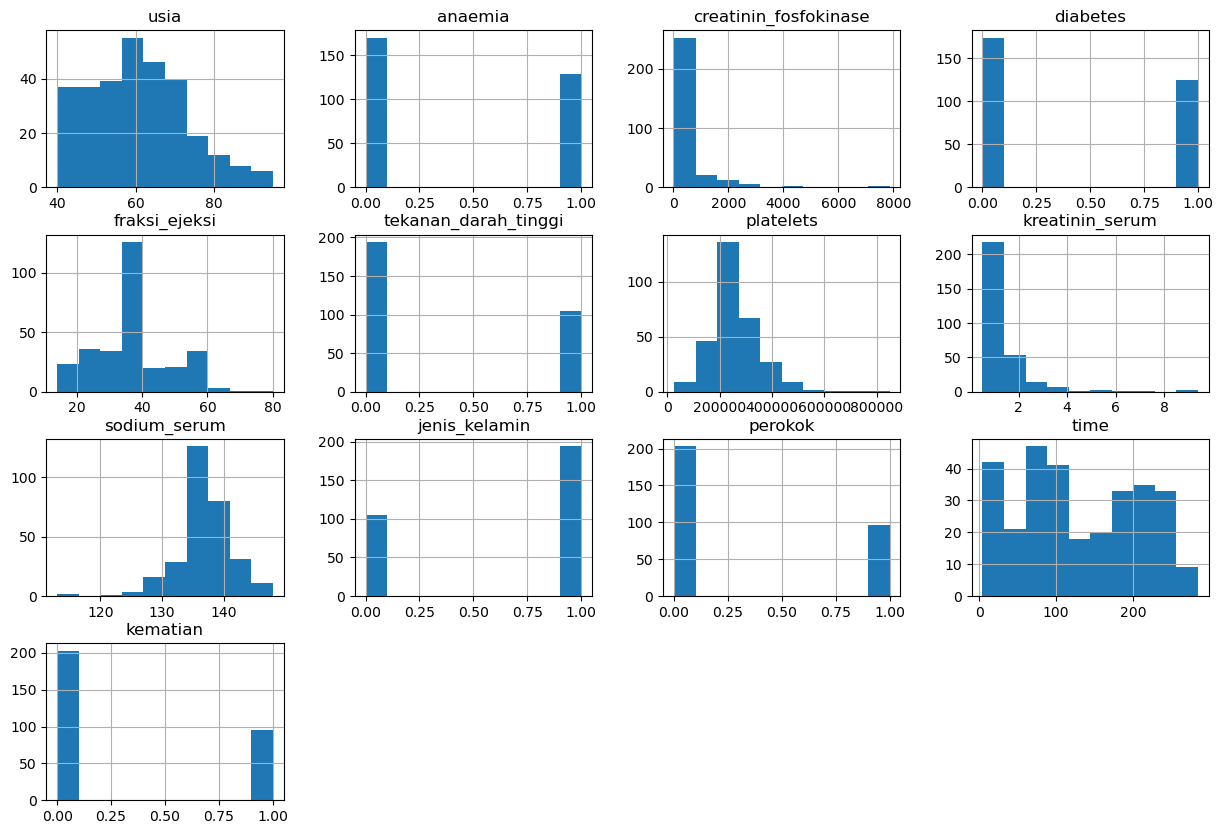

In [18]:
df_copy.hist(figsize=(15,10));



In [19]:
def visualisasi_distribusi_data(data_df, features, targetName='kematian', targetLabel=['No','Yes']):
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data_df[col][data_df[targetName]==0],
            label=targetLabel[0]+" :"+" Skew = " +
            str(np.round(data_df[col][data_df[targetName] == 0].skew(), 2)),
            kde=True,
            color='g',
            stat="density",
            linewidth=0
        )
        sns.histplot(
            data_df[col][data_df[targetName]==1],
            label=targetLabel[1]+" :"+" Skew = " +
            str(np.round(data_df[col][data_df[targetName] == 1].skew(), 2)),
            kde=True,
            color='b',
            stat="density",
            linewidth=0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data_df[targetName],
            y = data_df[col],
            hue = data_df[targetName])
        plt.subplot(133)
        stats.probplot(x=data_df[col], plot=plt)
        plt.tight_layout()
        plt.show()

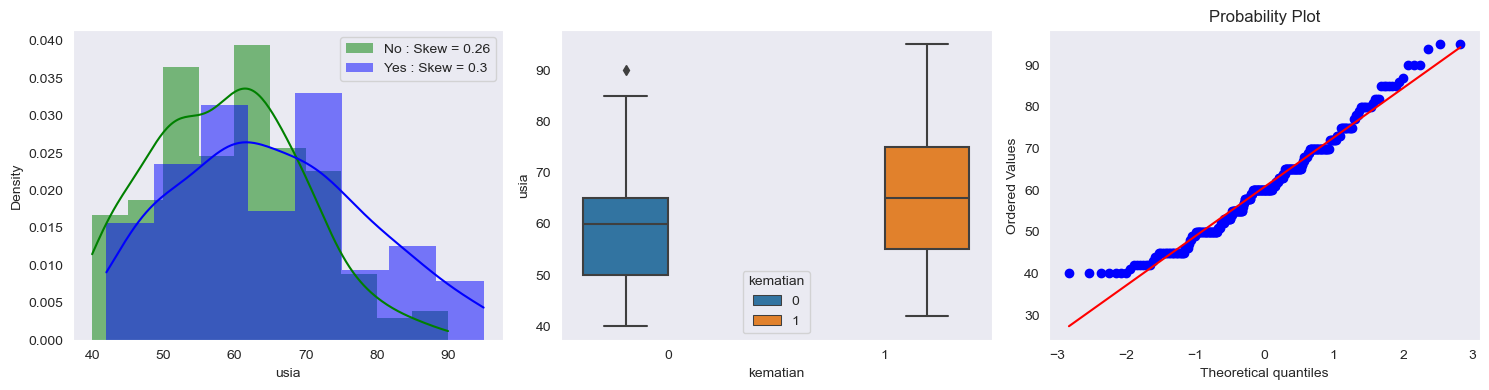

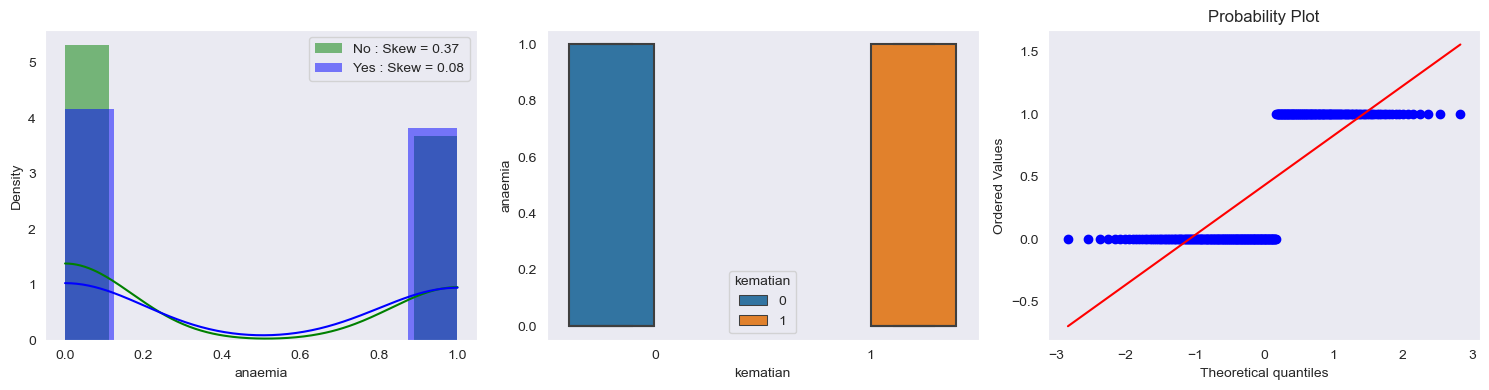

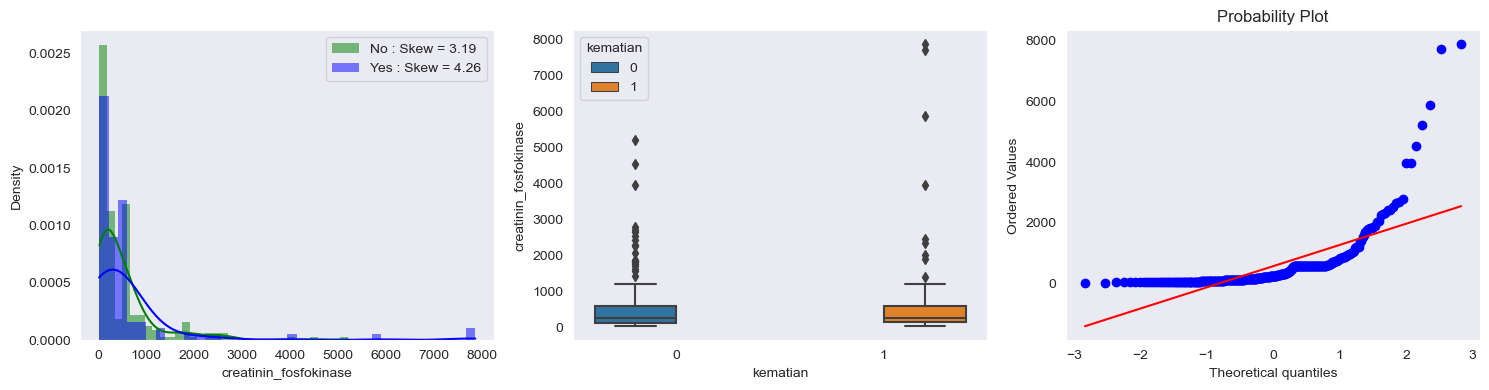

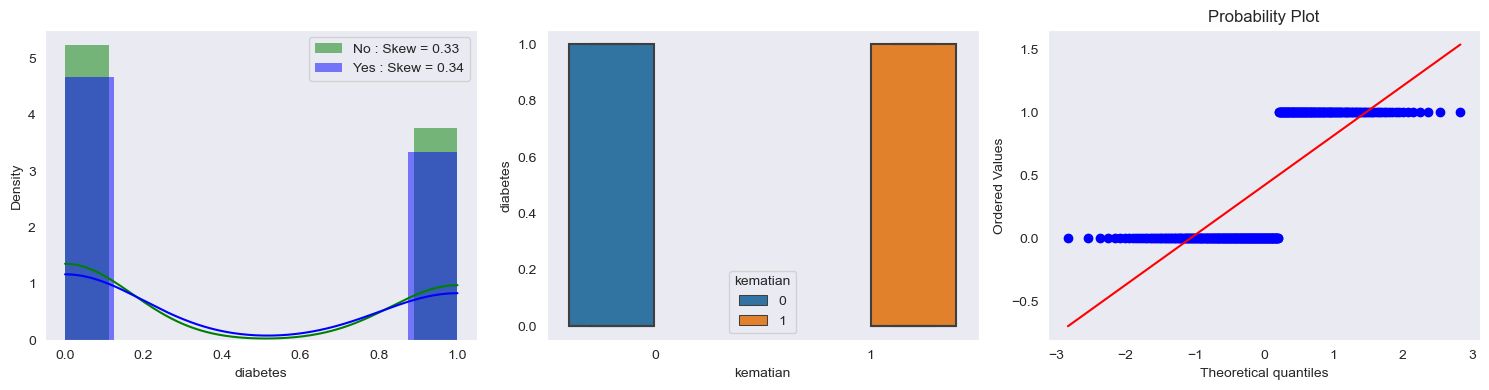

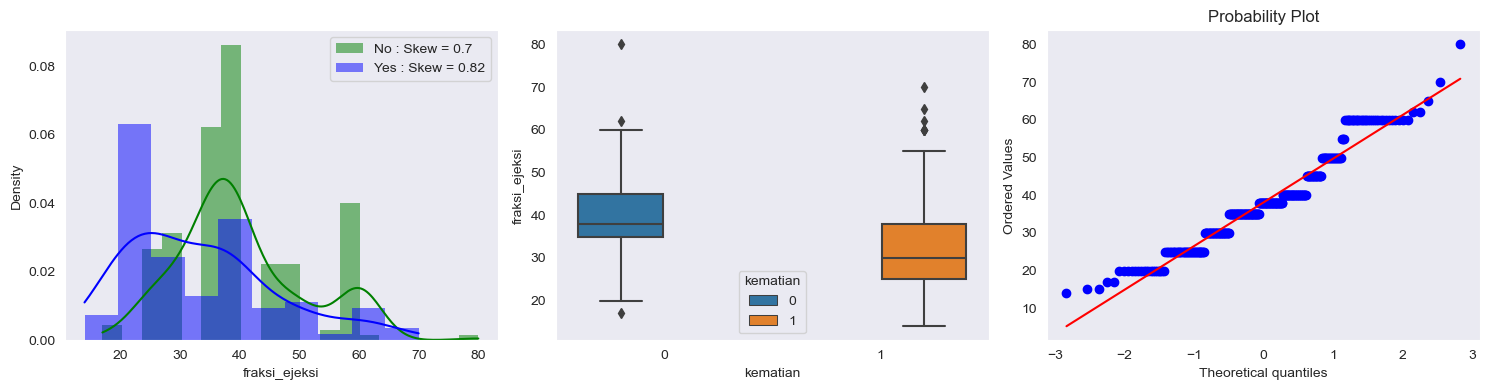

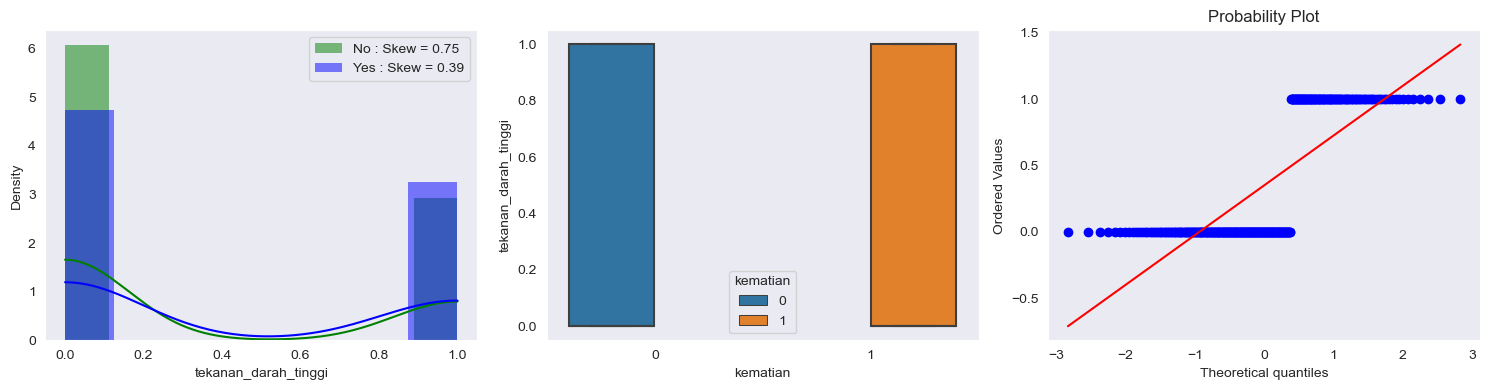

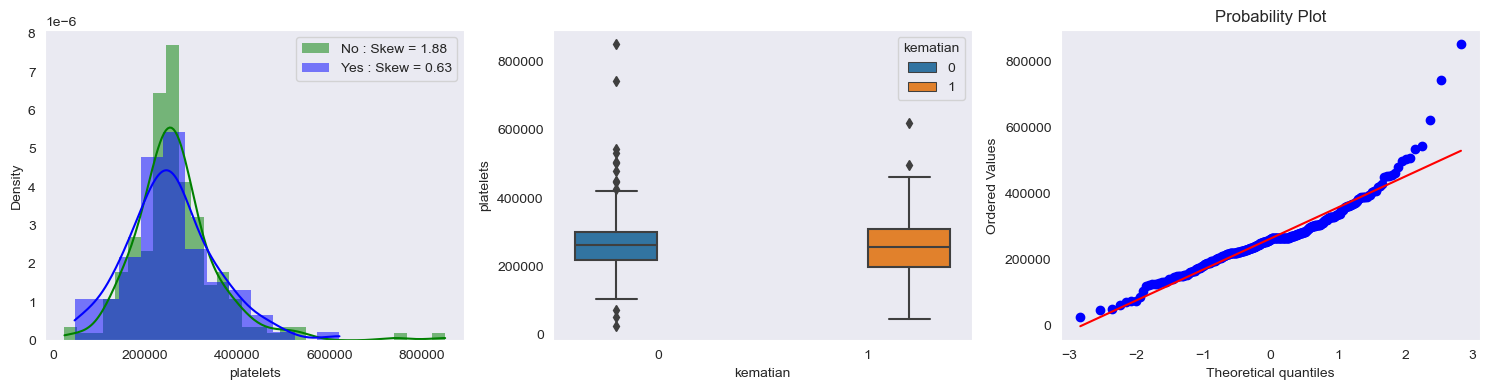

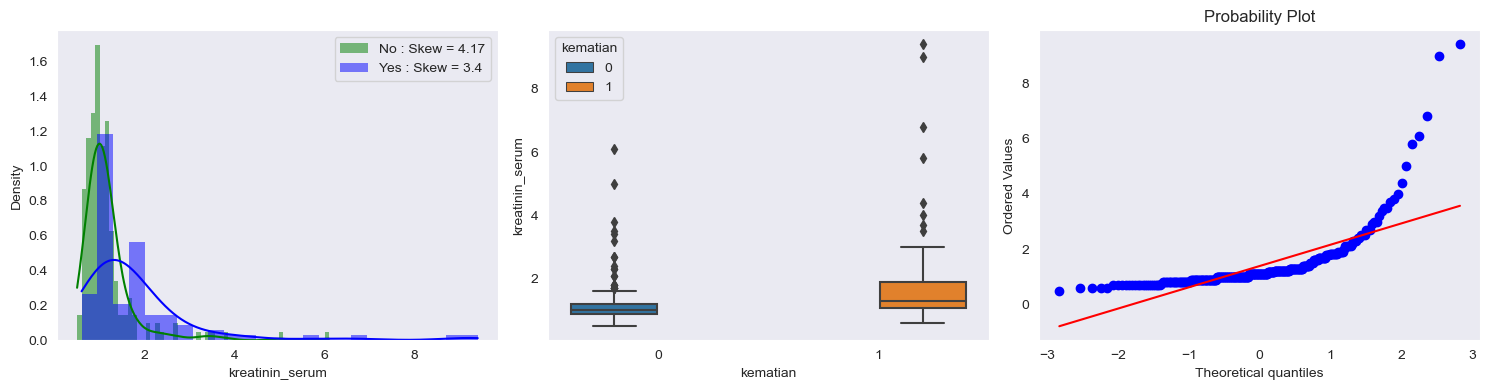

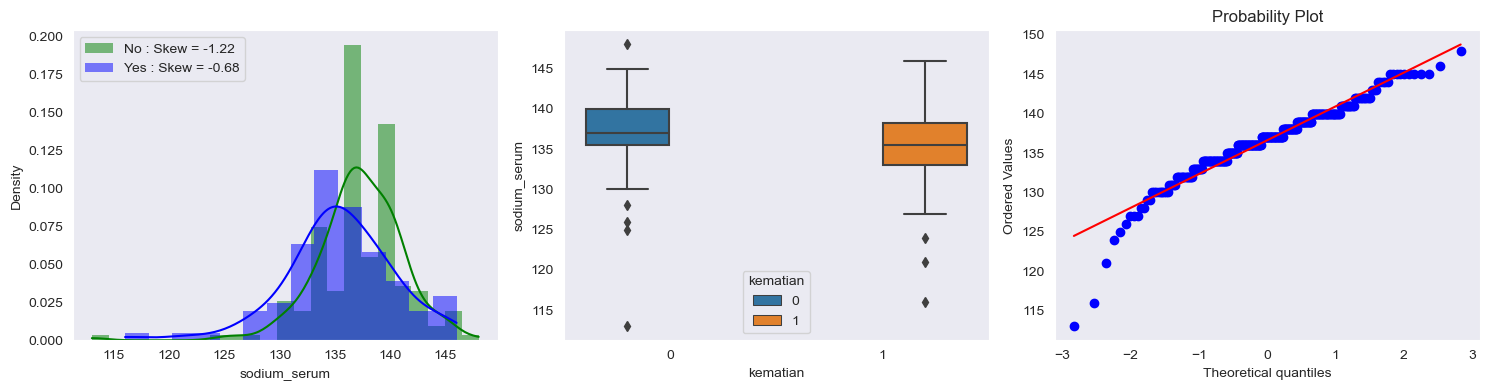

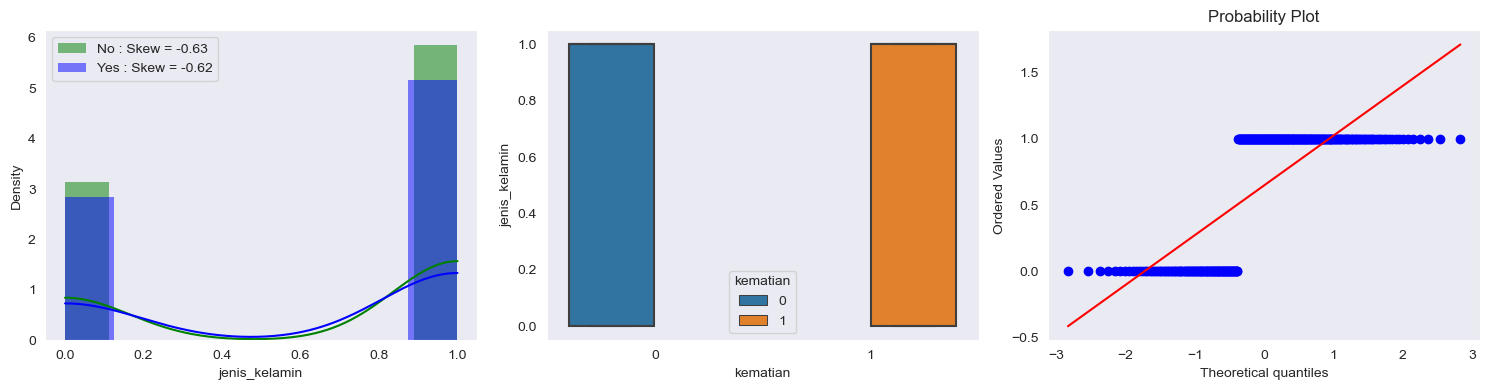

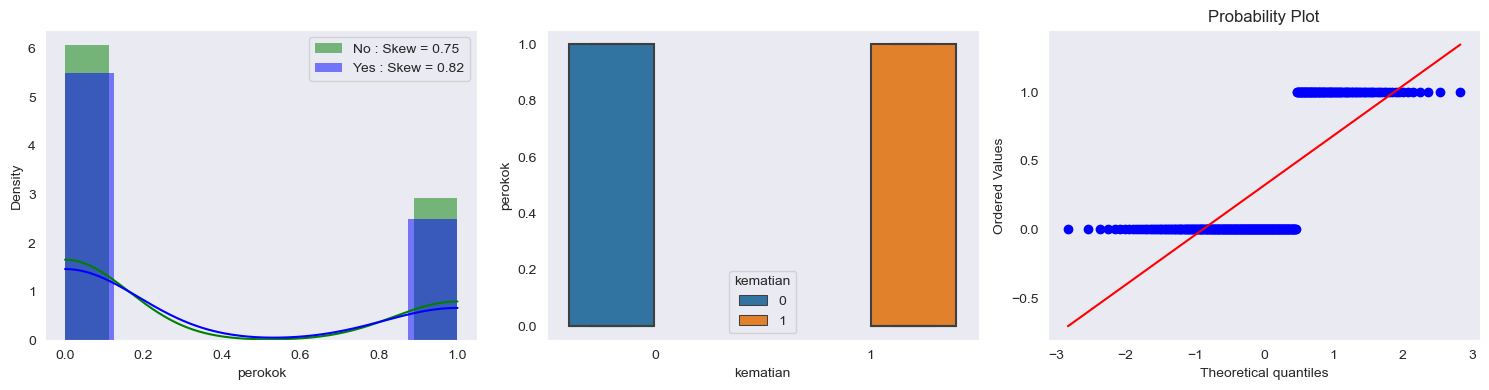

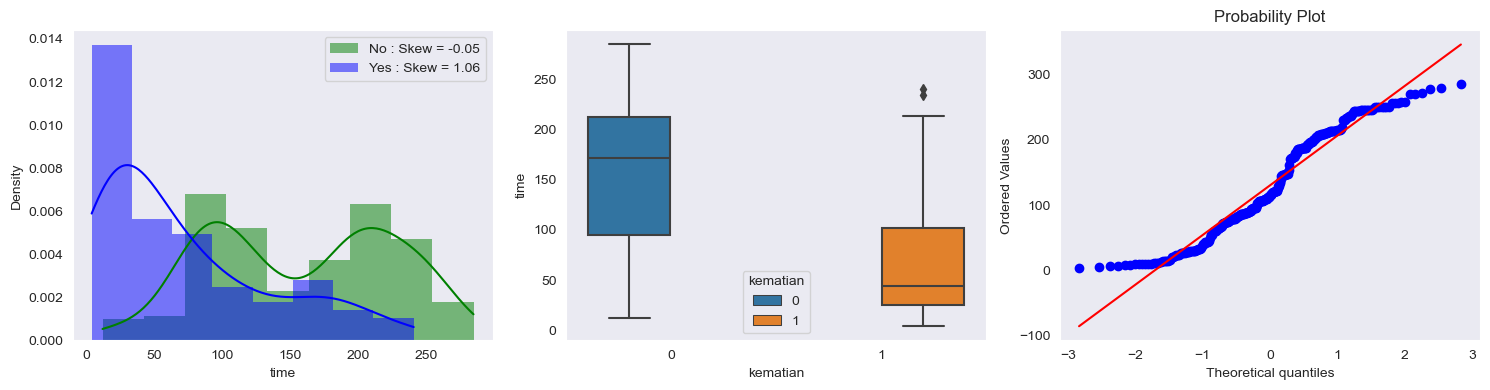

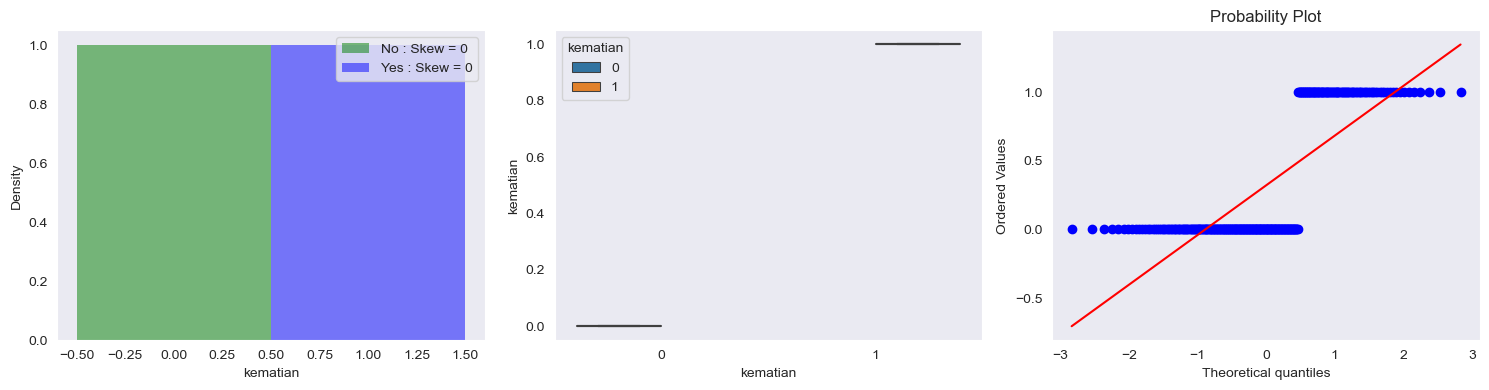

In [20]:
visualisasi_distribusi_data(df_copy,df_copy.columns.values)# Save Plot



Correlation of each columns and Visualization


In [21]:
df_copy.corr()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
usia,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinin_fosfokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
fraksi_ejeksi,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
tekanan_darah_tinggi,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
kreatinin_serum,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
sodium_serum,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
jenis_kelamin,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Visualization of each columns

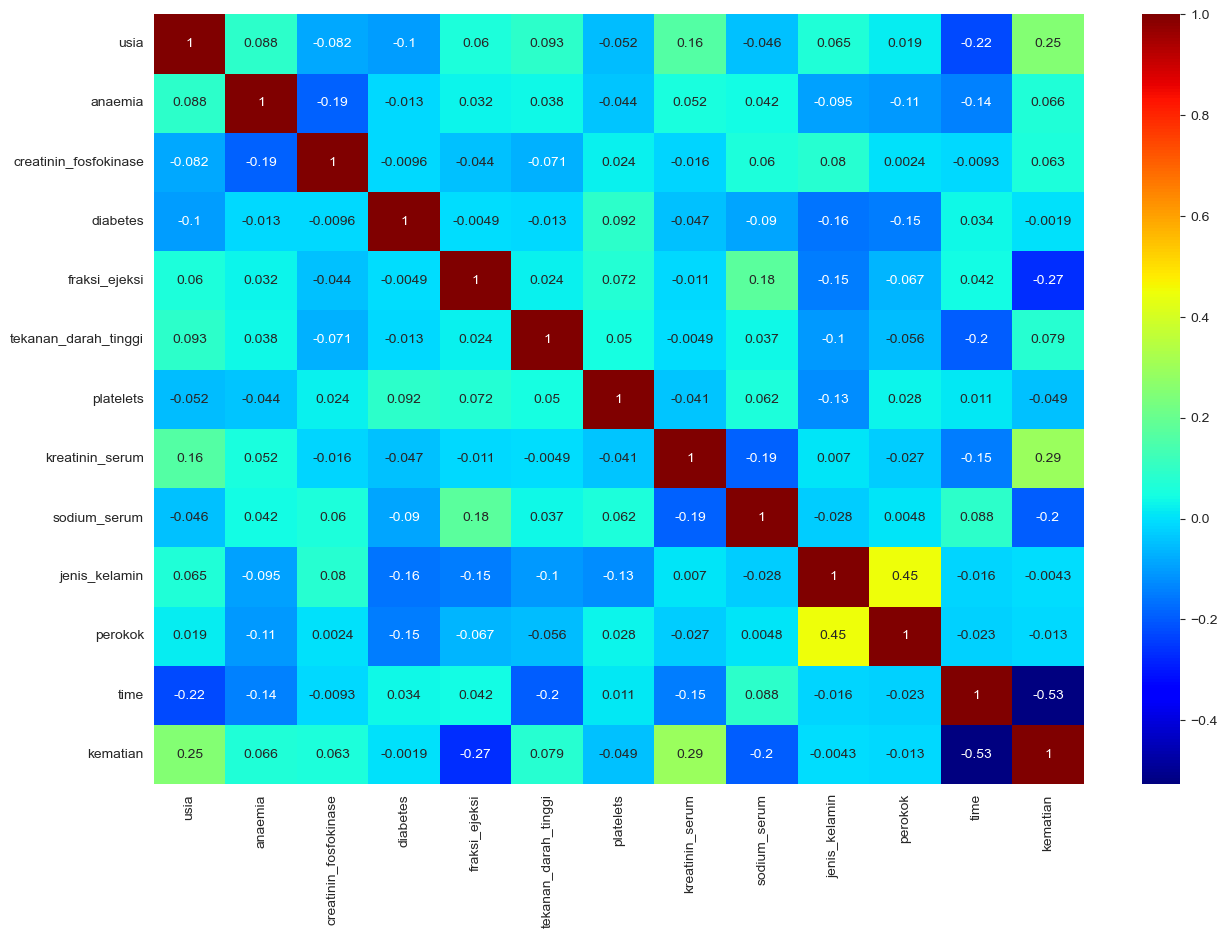

In [22]:
corr = df_copy.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True,cmap='jet');



visualization of death rates

<Axes: xlabel='kematian'>

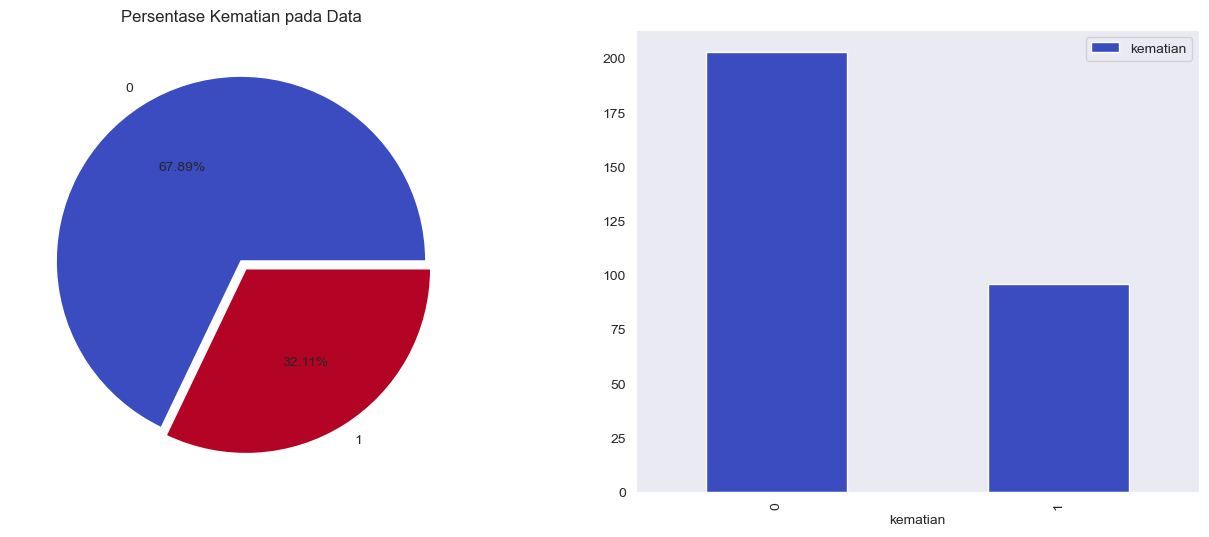

In [23]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "kematian"
df['kematian'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='coolwarm',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Persentase Kematian pada Data')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df_copy.groupby('kematian').agg({'kematian':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='coolwarm'
)



## F. Data Preprocessing

### F.1 Scaling dan Splitting Data

- Scaling data umumnya merujuk pada proses mengubah rentang nilai dari suatu variabel. Tujuan utama dari scaling adalah untuk menghasilkan distribusi nilai yang sebanding, sehingga satu variabel tidak mendominasi variabel lainnya. 

- Splitting data merujuk pada praktek membagi dataset menjadi dua atau lebih subset, yang umumnya digunakan untuk melatih dan menguji model. 

#Scaling Data

In [24]:
a = [i for i in df_copy.columns if i != 'kematian']

In [25]:
scaler = StandardScaler()
df_copy[a] = scaler.fit_transform(df_copy[a])
df_copy.head()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1


#Splitting Data

In [26]:
X = df_copy.drop('kematian', axis=1)
y = df_copy['kematian']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


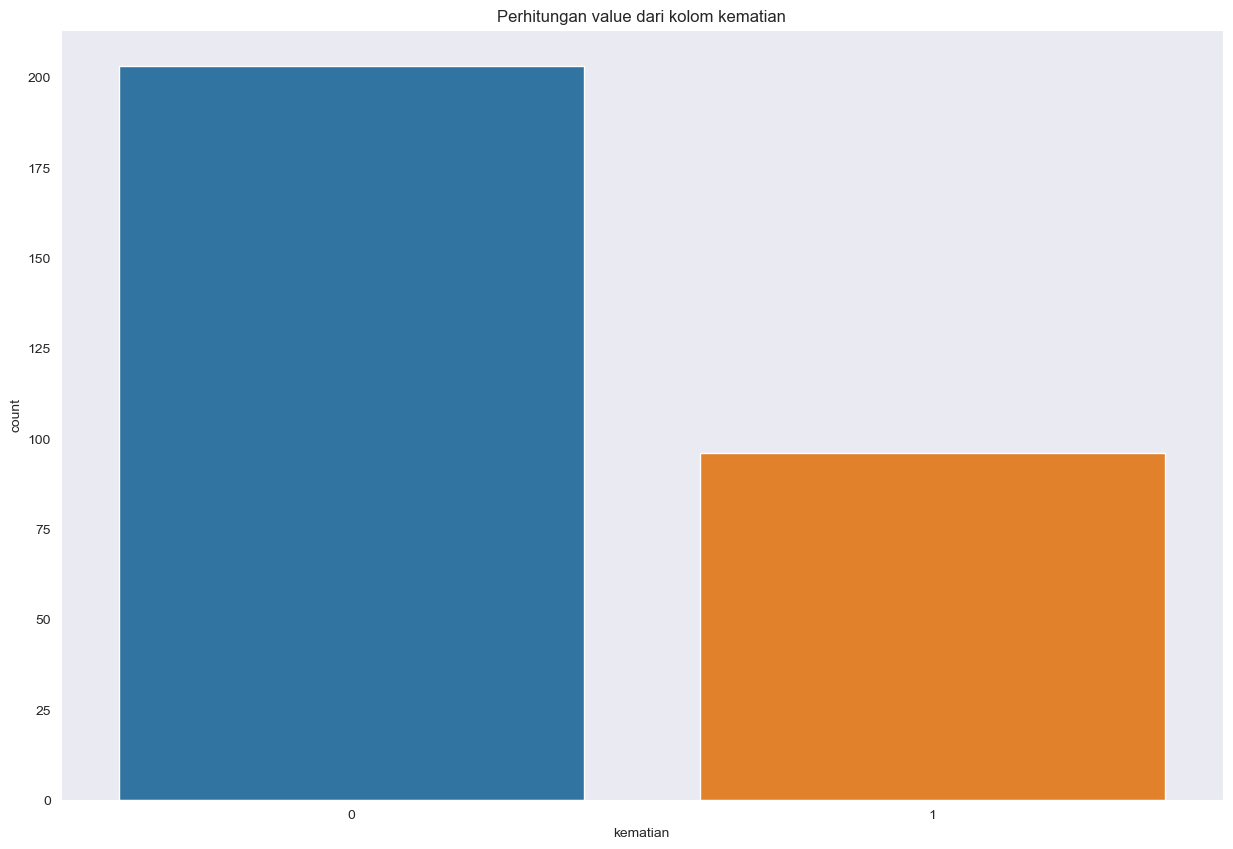

In [27]:
# Plot the labeled data
plt.figure(figsize=(15,10))
sns.countplot(x=df['kematian'])
plt.title('Perhitungan value dari kolom kematian')
plt.show()

dilihat dari visual tersebut bahwa data tidak seimbang, maka dari itu solusi untuk menyeimbangkannya adalah menggunakan SMOTE

In [28]:
X, y = SMOTE().fit_resample(X, y)

In [29]:
y.value_counts()

1    203
0    203
Name: kematian, dtype: int64

#### Train-Dev-Test
training data adalah bagian kunci dalam pengembangan model machine learning. Tujuan utama dari pelatihan data adalah untuk memberikan model informasi dan pola dari data yang diberikan sehingga model dapat belajar dan membuat prediksi atau keputusan yang akurat pada data baru yang belum pernah dilihat sebelumnya.

dalam develop project ini dilakukan metode self-training, self-training sediri mengacu pada pendekatan di mana model belajar dari data yang telah dihasilkan oleh model itu sendiri. 

metode persebaran data untuk self-training pada development model ini adalah 30% dari data akan diambil sebagai test set, sedangkan 70% sisanya akan menjadi train set.

- Train - Test Data Set-up

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=325)

## G.  Pendefinisian Model

- Dalam konsep Ensemble learning yaitu kita menggabungkan kekuatan beberapa model agar hasil prediksi lebih akurat. dalam kasus ini diharapkan kita menggunakan metode boosting juga.

- Boosting sendiri adalah sebuah metode di ensemble learning, fokus pada pembangunan model secara berulang dengan memberikan perhatian khusus pada data yang sulit diprediksi sebelumnya. Hal ini membantu meningkatkan kinerja model secara keseluruhan.

Model machine learning yang digunakan pada final project 3 ini adalah Random Forest Clasifier yang ditambahkan boosting yaitu AdaBoostClassifier dari Sklearn. namun dalam pengimplementasian dan trial and error kami menggunakan 2 skenario untuk pengujiannya yaitu:

- Random Forest Classifier tanpa additional parameter
- Random Forest Classifier dengan Boosting dengan AdaBoost Classifier

dari 2 skenario tersebut akan dicari model dengan skor akurasi tertinggi yang selanjutnya akan digunakan untuk proses selanjutnya


In [31]:
# pendefinisian model
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

## H. Pelatihan Model
Model Evaluation / pelatihan model yang sudah didefinisikan sebelumnya.


#### H.1 Random Forest Classifier tanpa additional parameter

In [32]:
# Train the model
rf.fit(X_train, y_train)

# Predict the training set
y_train_pred = rf.predict(X_train)

# Predict the test set
y_test_pred = rf.predict(X_test)

# Evaluate the model accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)

print("=============================================================")
print("Train Data Accuracy:", train_accuracy)

# Evaluate the model accuracy on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Data Accuracy:", test_accuracy)
print("=============================================================")

#  classification report on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Data Accuracy: 1.0
Test Data Accuracy: 0.8852459016393442

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        62
           1       0.85      0.93      0.89        60

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122



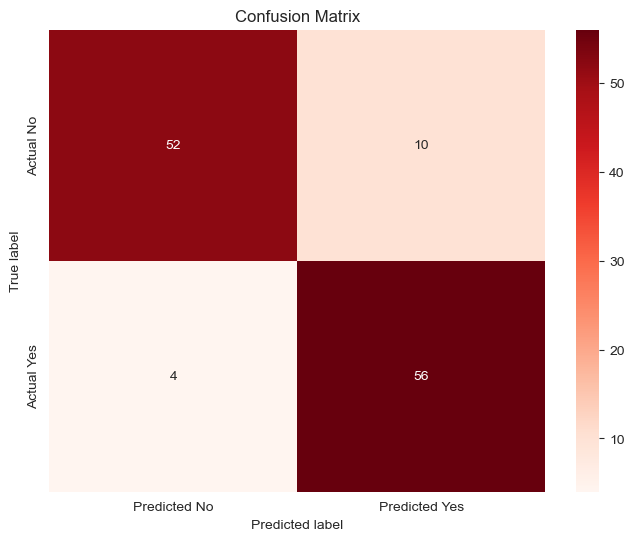

In [33]:
cm = confusion_matrix(y_test, y_test_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### H.2 Random Forest Classifier dengan Boosting dengan AdaBoost Classifier

In [34]:
# Train the model
ada.fit(X_train, y_train)

# Predict the training set
y_train_pred = ada.predict(X_train)

# Predict the test set
y_test_pred = ada.predict(X_test)

# Evaluate the model accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("=============================================================")
print("Train Data Accuracy:", train_accuracy)

# Evaluate the model accuracy on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Data Accuracy:", test_accuracy)
print("=============================================================")
#  classification report on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Data Accuracy: 0.8873239436619719
Test Data Accuracy: 0.8442622950819673

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        62
           1       0.83      0.87      0.85        60

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122



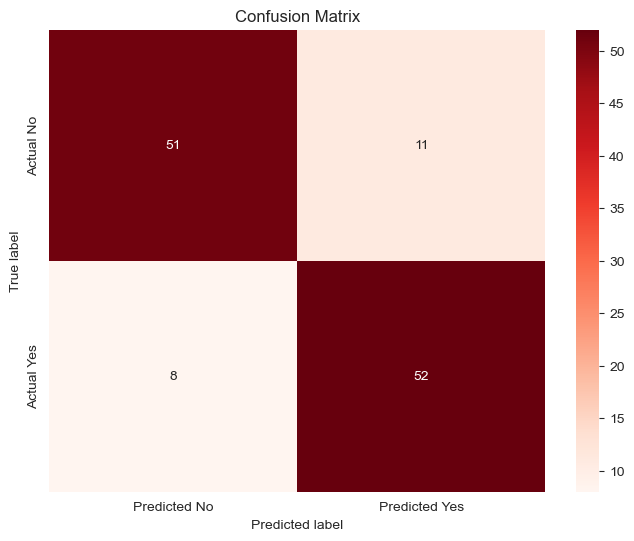

In [35]:
cm = confusion_matrix(y_test, y_test_pred)

# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Plot yang disajikan diatas merupakan confusion matrix dari 2 skenario yang sudah dijalankan. Confusion matrix adalah tabel yang digunakan untuk menggambarkan kinerja model klasifikasi pada suatu set data uji di mana nilai sebenarnya diketahui. 

Interpretasi plot ini adalah sebagai berikut:
- True Positive (TP) : jumlah kasus di mana model dengan benar memprediksi bahwa pasien akan meninggal 
- True Negative (TN) : jumlah kasus di mana model dengan benar memprediksi bahwa pasien tidak akan meninggal
- False Positive (FP) : jumlah kasus di mana model salah memprediksi bahwa pasien akan meninggal
- False Negative (FN) : jumlah kasus di mana model salah memprediksi bahwa tidak akan meninggal tetapi sebenarnya pasien tersebut sudah meninggal

Dengan menggunakan confusion matrix, kita dapat mengevaluasi kinerja kedua model machine learning dengan melihat kemampuannya dalam mengklasifikasikan instance dengan benar dan mengidentifikasi area di mana kesalahan klasifikasi terjadi. Hal ini bertujuan untuk mencapai nilai tinggi pada elemen diagonal (yang menunjukkan prediksi yang benar) dan nilai rendah di luar diagonal (menunjukkan kesalahan klasifikasi).

## J. Model Inference

tolong diperhatikan inputnya harus sesuai pengisiannya seperti yang ada didataset.(disesuaikan juga dengan kondisi pasien aslinya).

* bisa menggunakan tabel berikut sebagai acuan pengisian input model inference

In [36]:
df.head()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis_kelamin,perokok,time,kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- 0 = Tidak
- 1 = Iya

jenis kelamin

- 1 = laki-laki
- 0 = Perempuan

========TESTING APLIKASI DENGAN INPUT SEBAGAI DATA BARU======

In [40]:
usia=float(input('umur :'))
anaemia=int(input('anaemia :'))
creatinin_fosfokinase=int(input('creatinin fosfokinase :'))
diabetes=int(input('diabetes :'))
fraksi_ejeksi=int(input('fraksi ejeksi :'))
tekanan_darah_tinggi=int(input('tekanan darah tinggi :'))
platelets=float(input('platelets : '))
kreatinin_serum=float(input('kreatin serum :'))
sodium_serum=int(input('sodium serum :'))
jenis_kelamin=int(input('jenis kelamin :'))
perokok=int(input('perokok :'))
time=int(input('time :'))

x_input=[[
    usia,
    anaemia,
    creatinin_fosfokinase,
    diabetes,
    fraksi_ejeksi,
    tekanan_darah_tinggi,
    platelets,
    kreatinin_serum,
    sodium_serum,
    jenis_kelamin,
    perokok,
    time
]]

x_input=scaler.fit_transform(x_input)
y_output=rf.predict(x_input)
if y_output==0:
    print('tidak meninggal')
else:
    print('meninggal')

tidak meninggal


*dalam percobaan diatas digunakan model (rf) untuk percobaan, model tersebut dapat diubah juga menjadi model adaBoost yang sudah dibuat tadi.

## K. Pengambilan Kesimpulan

### Berikut adalah potongan dari sesi Pengenalan project
- Objective yang ingin dicapai :
    - Mampu memahami konsep Classification dengan Ensemble Model
    - Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
    - Mampu mengimplementasikan Ensemble Model untuk membuat prediksi


- Hasil yang diharapkan :
    - Model dapat memprediksi kematian pasien dengan indikasi gagal jantung menggunakan model machine learning yang dibuat yaitu menggunkan konsep Ensemble.


### Kesimpulan

- Berdasarkan objektif yang ingin dicapai:
    - Kelompok 4 KS18 berhasil memahami konsep machine learning dengan konsep Ensemble model : Ensemble model adalah pendekatan dalam machine learning yang melibatkan penggabungan beberapa model prediktif untuk meningkatkan kinerja dan ketepatan prediksi dibandingkan dengan penggunaan satu model tunggal.
    - Dengan proses yang sudah dilakukan diatas membuktikan kelompok 4 KS18 Mampu mempersiapkan data untuk digunakan pada konsep Ensamble model.
    - Model yang telah dibuat oleh Kelompok 4 KS18 dapat digunakan untuk membuat prediksi kematian akibat gagal jantung berdasarkan dataset yang diberikan.

- Berdasarkan hasil yang diharapkan:
    - dengan model machine learning yang telah didevelop kami berhasil membuat model tersebut dapat memprediksi kematian pasien karena gagal jantung

In [38]:
# Save to Pickle
# Save Base Random Forest Model to Pickle
with open('base_randomforest_model.pkl', 'wb') as file:
   pickle.dump(rf, file)

In [39]:


#Save to Pickle
#Save Best Feature Random Forest Model to Pickle
with open('ada_boost_model.pkl', 'wb') as file:
  pickle.dump(ada, file)